### This file contains code to perform recursive feature engineering for the dataset.

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from statistics import variance as v
import matplotlib.pyplot as plt


In [ ]:
# Change name according to the name of dataset uploaded.
df1= pd.read_csv("final_dataset_coinbase_illicit.csv", index_col=[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681 entries, 0 to 4680
Data columns (total 35 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Unnamed: 0                                             4681 non-null   int64  
 1   Index                                                  4681 non-null   int64  
 2   Address                                                4681 non-null   object 
 3   FLAG                                                   4681 non-null   int64  
 4   Avg_min_between_sent_tnx                               4681 non-null   float64
 5   Avg_min_between_received_tnx                           4681 non-null   float64
 6   Time_Diff_between_first_and_last_(Mins)                4681 non-null   float64
 7   Sent_tnx                                               4681 non-null   int64  
 8   Received_Tnx                                    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

In [ ]:
# Train Test Split
Y = df1['FLAG']
X = df1.drop(labels=['Unnamed: 0','FLAG','Address','Index'],axis=1)

#Scaling the data
#scaler = StandardScaler()
mmscaler= MinMaxScaler()
X_scaled=mmscaler.fit_transform(X)

#Spliting into 70/30 ratio with scaling
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1)

model_list=[] # Initializing to save accuracy values.

print("Number of test samples:", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples: 1405
Number of training samples: 3276


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
rfc = RandomForestClassifier()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    n_jobs=2
)
rfecv.fit(X, Y)
print(f"Optimal number of features: {rfecv.n_features_}")

rfecv_rfc = RFECV(
    estimator=rfc,
    cv=cv,
    scoring="accuracy"
)
rfecv_rfc.fit(X, Y)
print(f"Optimal number of features: {rfecv_rfc.n_features_}")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimal number of features: 11
Optimal number of features: 25


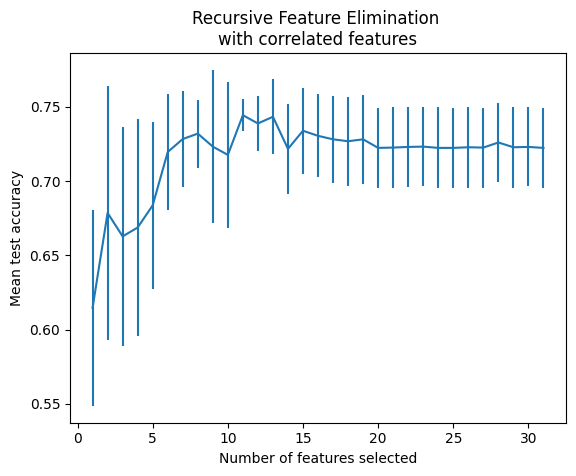

In [ ]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

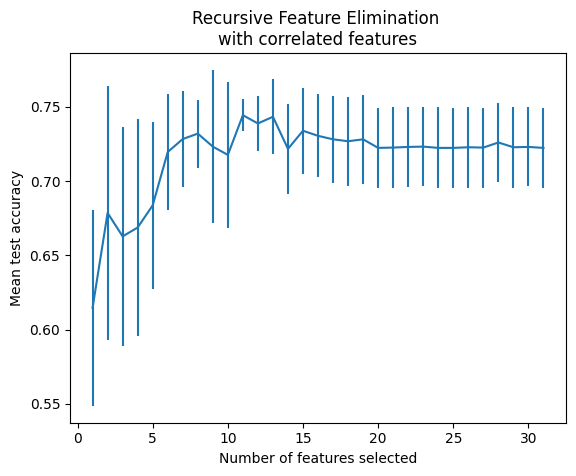

In [ ]:
n_scores = len(rfecv_rfc.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [ ]:
mask=rfecv_rfc.get_support()
feature=X.columns
best_features = feature[mask]
print(rfecv_rfc.ranking_)
print(best_features)

[1 1 1 1 1 4 1 5 1 1 1 2 1 1 1 1 1 1 1 1 6 1 7 1 1 1 1 1 1 3 1]
Index(['Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last_(Mins)', 'Sent_tnx', 'Received_Tnx',
       'Unique_Received_From_Addresses', 'min_value_received',
       'max_value_received', 'avg_val_received', 'avg_val_sent',
       'total_transactions_(including_tnx_to_create_contract)',
       'total_Ether_sent', 'total_ether_received', 'total_ether_balance',
       'Total_ERC20_tnxs', 'ERC20_total_Ether_received',
       'ERC20_total_ether_sent', 'ERC20_uniq_rec_addr',
       'ERC20_uniq_rec_contract_addr', 'ERC20_min_val_rec',
       'ERC20_max_val_rec', 'ERC20_min_val_sent', 'ERC20_max_val_sent',
       'ERC20_avg_val_sent', 'ERC20_uniq_rec_token_name'],
      dtype='object')


In [ ]:
mask=rfecv.get_support()
feature=X.columns
best_features = feature[mask]
best_features

Index(['Avg_min_between_sent_tnx', 'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last_(Mins)', 'total_Ether_sent',
       'total_ether_received', 'total_ether_balance',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_max_val_rec', 'ERC20_min_val_sent', 'ERC20_max_val_sent'],
      dtype='object')